# Unit 5 - Financial Planning

In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
# YOUR CODE HERE!
my_btc = 1.2
my_eth = 5.3

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

In [5]:
# Fetch current BTC price
# YOUR CODE HERE!
btc = requests.get(btc_url).json()
price_btc = btc["data"]['1']['quotes']['USD']['price']
# Fetch current ETH price
# YOUR CODE HERE!
eth = requests.get(eth_url).json()
price_eth = eth["data"]['1027']['quotes']['USD']['price']

# Compute current value of my crpto
# YOUR CODE HERE!
my_btc_value = my_btc * price_btc
my_eth_value = my_eth * price_eth

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $24936.00
The current value of your 5.3 ETH is $8082.45


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [6]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [7]:
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

print(type(alpaca_api_key))

api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2"
)

<class 'str'>


In [8]:
# Format current date as ISO format
# YOUR CODE HERE!
today = pd.Timestamp("2023-01-10", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to "1Day" for Alpaca API
timeframe = "1Day"

# Get current closing prices for SPY and AGG
# YOUR CODE HERE!

df_portfolio = api.get_bars(
    tickers,
    timeframe,
    start = today,
    end = today
).df
# Reorganize the DataFrame
# Separate ticker data
# YOUR CODE HERE!
AGG = df_portfolio[df_portfolio['symbol']=='AGG'].drop('symbol', axis=1)
SPY = df_portfolio[df_portfolio['symbol']=='SPY'].drop('symbol', axis=1)


# Concatenate the ticker DataFrames
# YOUR CODE HERE!
df_portfolio = pd.concat([AGG, SPY], axis=1, keys=['AGG', 'SPY'])

# Preview DataFrame
# YOUR CODE HERE!

df_portfolio

AGG                                              \
                            open   high      low  close   volume trade_count   
timestamp                                                                      
2023-01-10 05:00:00+00:00  99.02  99.15  98.7401  98.96  7291303       28480   

                                         SPY                          \
                                vwap    open    high     low   close   
timestamp                                                              
2023-01-10 05:00:00+00:00  98.897523  387.25  390.65  386.27  390.58   

                                                            
                             volume trade_count       vwap  
timestamp                                                   
2023-01-10 05:00:00+00:00  65367664      472370  389.08215

In [9]:
# Pick AGG and SPY close prices
# YOUR CODE HERE!
agg_close_price = df_portfolio["AGG"]["close"][-1]
spy_close_price = df_portfolio["SPY"]["close"][-1]
#
# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $98.96
Current SPY closing price: $390.58


In [10]:
# Compute the current value of shares
# YOUR CODE HERE!
my_spy_value = my_spy * spy_close_price
my_agg_value = my_agg * agg_close_price

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $19529.00
The current value of your 200 AGG shares is $19792.00


### Savings Health Analysis

In [11]:
# Set monthly household income
# YOUR CODE HERE!
monthly_household_income = 12000
# Consolidate financial assets data
# YOUR CODE HERE!
shares_total = my_spy_value + my_agg_value
crypto_total = my_eth_value + my_btc_value
savings = {"Total Assets":[shares_total,crypto_total]}
# Create savings DataFrame
# YOUR CODE HERE!
df_savings = pd.DataFrame(savings, index=['Shares Holdings', 'Crypto Holdings'])
# Display savings DataFrame
display(df_savings)

,Total Assets
Shares Holdings,39321.000
Crypto Holdings,33018.447


array([<AxesSubplot:ylabel='Total Assets'>], dtype=object)

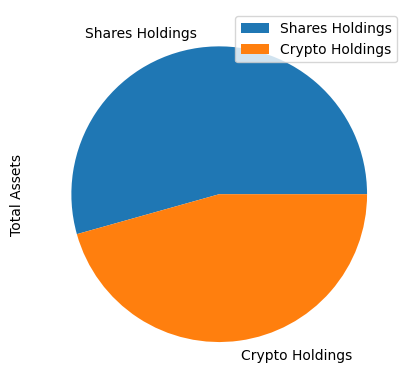

In [12]:
# Plot savings pie chart
# YOUR CODE HERE!
df_savings.plot(kind="pie", subplots=True)

In [13]:
# Set ideal emergency fund
emergency_fund = monthly_household_income * 3

# Calculate total amount of savings
# YOUR CODE HERE!
savings_total = float(df_savings.sum())
savings_remaining = emergency_fund - savings_total
# Validate saving health
# YOUR CODE HERE!

if savings_total > emergency_fund:
    print("Your savings are sufficent!")
elif savings_total == emergency_fund:
    print("Your savings = your emergency_fund!")
else:
    print(f"You need {savings_remaining} to aford that charge!")

Your savings are sufficent!


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [14]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2018-01-10', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2023-01-10', tz='America/New_York').isoformat()

In [15]:
# Get 5 years' worth of historical data for SPY and AGG
# YOUR CODE HERE!
timeframe = "1Day"

ticker = ["SPY", "AGG"]

df_stock_data = api.get_bars(
    ticker,
    timeframe,
    start=start_date,
    end=end_date
).df
# Reorganize the DataFrame
# Separate ticker data
# YOUR CODE HERE!
AGG = df_stock_data[df_stock_data['symbol']=='AGG'].drop('symbol', axis=1)
SPY = df_stock_data[df_stock_data['symbol']=='SPY'].drop('symbol', axis=1)


# Concatenate the ticker DataFrames
# YOUR CODE HERE!
df_stock_df = pd.concat([AGG, SPY], axis=1, keys=['AGG', 'SPY']).dropna()

# Display sample data
df_stock_df.head()

AGG                                     \
                             open     high      low   close   volume   
timestamp                                                              
2018-01-10 05:00:00+00:00  108.48  108.720  108.430  108.71  4194402   
2018-01-11 05:00:00+00:00  108.66  108.860  108.610  108.76  3470492   
2018-01-12 05:00:00+00:00  108.64  108.830  108.630  108.74  3605949   
2018-01-16 05:00:00+00:00  108.87  108.980  108.715  108.77  6802231   
2018-01-17 05:00:00+00:00  108.73  108.839  108.620  108.65  3146639   

                                                      SPY                    \
                          trade_count        vwap    open    high       low   
timestamp                                                                     
2018-01-10 05:00:00+00:00       15319  108.567875  273.69  274.42  272.9200   
2018-01-11 05:00:00+00:00       15674  108.746211  274.75  276.12  274.5600   
2018-01-12 05:00:00+00:00       15808  108.736881  276.42  278.11  276.0819   
2018-01-16 05:00:00+00:00       23217  108.810829  279.35  280.09  276.1800   
2018-01-17 05:00:00+00:00       12426  108.715719  278.04  280.05  276.9700   

                                                                      
                            close     volume trade_count        vwap  
timestamp                                                             
2018-01-10 05:00:00+00:00  274.08   69612104      209105  273.957656  
2018-01-11 05:00:00+00:00  276.09   65361555      188737  275.410033  
2018-01-12 05:00:00+00:00  277.94   94192056      269924  277.486825  
2018-01-16 05:00:00+00:00  277.06  110580442      342987  278.064753  
2018-01-17 05:00:00+00:00  279.61  113460275      262693  278.783144

In [16]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!

num_sims = 500
num_yrs = 30
weights = [0.2,0.8]
Monte_Carlo_Simulation = MCSimulation(
                portfolio_data = df_stock_df,
                weights = weights,
                num_simulation = num_sims,
                num_trading_days = 252*num_yrs)

In [17]:
# Printing the simulation input data
# YOUR CODE HERE!
Monte_Carlo_Simulation.portfolio_data.head()

AGG                                     \
                             open     high      low   close   volume   
timestamp                                                              
2018-01-10 05:00:00+00:00  108.48  108.720  108.430  108.71  4194402   
2018-01-11 05:00:00+00:00  108.66  108.860  108.610  108.76  3470492   
2018-01-12 05:00:00+00:00  108.64  108.830  108.630  108.74  3605949   
2018-01-16 05:00:00+00:00  108.87  108.980  108.715  108.77  6802231   
2018-01-17 05:00:00+00:00  108.73  108.839  108.620  108.65  3146639   

                                                                   SPY  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2018-01-10 05:00:00+00:00       15319  108.567875          NaN  273.69   
2018-01-11 05:00:00+00:00       15674  108.746211     0.000460  274.75   
2018-01-12 05:00:00+00:00       15808  108.736881    -0.000184  276.42   
2018-01-16 05:00:00+00:00       23217  108.810829     0.000276  279.35   
2018-01-17 05:00:00+00:00       12426  108.715719    -0.001103  278.04   

                                                                            \
                             high       low   close     volume trade_count   
timestamp                                                                    
2018-01-10 05:00:00+00:00  274.42  272.9200  274.08   69612104      209105   
2018-01-11 05:00:00+00:00  276.12  274.5600  276.09   65361555      188737   
2018-01-12 05:00:00+00:00  278.11  276.0819  277.94   94192056      269924   
2018-01-16 05:00:00+00:00  280.09  276.1800  277.06  110580442      342987   
2018-01-17 05:00:00+00:00  280.05  276.9700  279.61  113460275      262693   

                                                    
                                 vwap daily_return  
timestamp                                           
2018-01-10 05:00:00+00:00  273.957656          NaN  
2018-01-11 05:00:00+00:00  275.410033     0.007334  
2018-01-12 05:00:00+00:00  277.486825     0.006701  
2018-01-16 05:00:00+00:00  278.064753    -0.003166  
2018-01-17 05:00:00+00:00  278.783144     0.009204

In [18]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!
Monte_Carlo_Simulation.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/spencerbrown/Desktop/Fintech_Etc/Challenge_HW/ASU_HW-5/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.002879,0.993056,0.999177,1.009688,0.994059,0.992636,1.017332,0.987935,0.991025,1.009537,...,1.001830,1.003622,1.002000,0.995711,0.990202,0.984705,1.005736,0.992226,0.997893,1.001775
2,0.988841,0.993605,1.002420,1.007790,0.994720,1.001005,1.018200,0.983421,0.999347,1.013795,...,0.994446,1.019989,1.002308,0.985417,0.977717,0.975313,0.997737,0.982602,1.003079,1.013151
3,0.987946,0.992513,1.004976,1.000807,0.994791,1.005254,1.013275,0.967242,0.985839,1.010576,...,1.001779,1.010898,1.023412,0.988095,0.970454,0.978125,0.979254,0.956240,1.004206,0.989763
4,0.996835,0.987773,1.007957,0.997483,0.985094,0.995843,1.013736,0.965177,0.980052,1.009595,...,1.013371,0.998916,1.011703,0.987441,0.961192,0.971380,0.973981,0.949887,0.991899,0.975949
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,8.098145,30.023185,39.442097,2.026729,0.809965,13.148412,0.742926,2.758635,14.240902,1.760290,...,6.385082,1.470517,1.182640,4.604832,5.068332,5.645623,14.857994,9.585576,19.863693,10.866659
7557,8.038816,30.536265,39.377923,2.008707,0.800674,13.292459,0.743825,2.769343,14.254418,1.758949,...,6.376530,1.459852,1.178724,4.647057,5.135913,5.731323,14.861745,9.467854,19.928791,10.875504
7558,8.080973,30.386200,39.404454,1.974474,0.797260,13.548646,0.737757,2.772089,14.350263,1.757379,...,6.440076,1.445661,1.181845,4.622349,5.188334,5.687132,14.825229,9.445839,20.004203,10.833720
7559,8.066878,30.380611,38.998360,1.957166,0.822785,13.598683,0.731996,2.818876,14.230482,1.754736,...,6.415666,1.429146,1.182577,4.530572,5.227117,5.721104,14.561962,9.360283,20.568038,10.774272


<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 7560 Trading Days.'}>

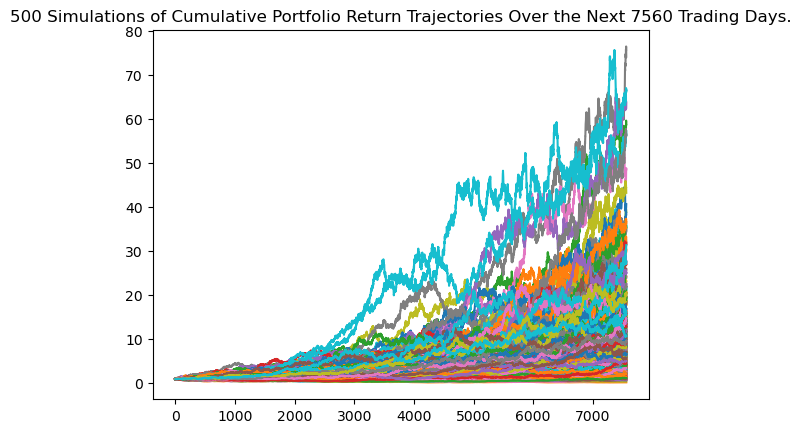

In [19]:
# Plot simulation outcomes
# YOUR CODE HERE!
Monte_Carlo_Simulation.plot_simulation()

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

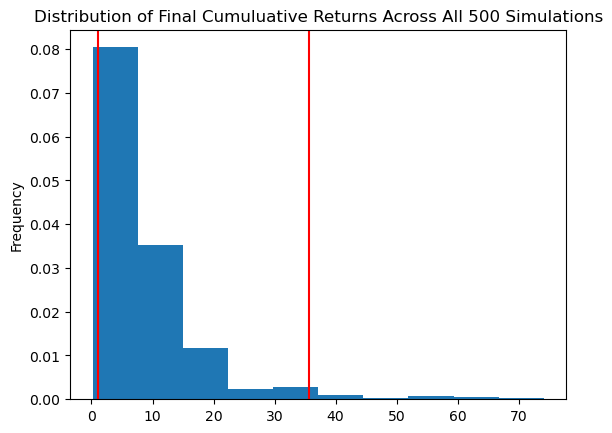

In [20]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!
Monte_Carlo_Simulation.plot_distribution()

### Retirement Analysis

In [21]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!
table = Monte_Carlo_Simulation.summarize_cumulative_return()
# Print summary statistics
# YOUR CODE HERE!
print(table)

count           500.000000
mean              8.856800
std               9.527445
min               0.219268
25%               3.227344
50%               5.903953
75%              10.645888
max              74.095751
95% CI Lower      1.105241
95% CI Upper     35.574276
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [ ]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [ ]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [ ]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Plot simulation outcomes
# YOUR CODE HERE!

In [ ]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

In [ ]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

### Ten Years Retirement Option

In [ ]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Plot simulation outcomes
# YOUR CODE HERE!

In [ ]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

In [ ]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")